# Original Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
amazon_df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
imdb_df = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)
yelp_df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

#socre 1 = positive, score 0 = negative
amazon_df.columns = ['sentance', 'score']
imdb_df.columns = ['sentance', 'score']
yelp_df.columns = ['sentance', 'score']

amazon_df.head()
#imdb_df.head()
#yelp_df.head()

,sentance,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
positive_words = ['good', 'great', 'excellent', 'best', 'super', 'love', 'like', 'favorite']

for word in positive_words:
    amazon_df[str(word)] = amazon_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)

In [4]:
amazon_df

,sentance,score,good,great,excellent,best,super,love,like,favorite
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,True,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False


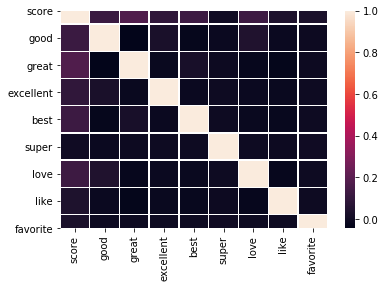

In [5]:
#checking to see that our assumption 
sns.heatmap(amazon_df.corr(), linewidth=.5)
plt.show()

In [6]:
amazon_data = amazon_df[positive_words]
amazon_target = amazon_df['score']

In [7]:
bnb = BernoulliNB()

bnb.fit(amazon_data, amazon_target)

amazon_pred = bnb.predict(amazon_data)

In [8]:
print('there were {} incorrect predictions out of {} for amazon data'.format((amazon_target != amazon_pred).sum(), amazon_pred.shape[0]))


there were 399 incorrect predictions out of 1000 for amazon data


In [9]:
for word in positive_words:
    imdb_df[str(word)] = imdb_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)
    
for word in positive_words:
    yelp_df[str(word)] = yelp_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)

In [10]:
imdb_data = imdb_df[positive_words]
yelp_data = yelp_df[positive_words]

imdb_target = imdb_df['score']
yelp_target = yelp_df['score']

In [11]:
imdb_pred = bnb.predict(imdb_data)
yelp_pred = bnb.predict(yelp_data)

In [12]:
print('there were {} incorrect predictions out of {} for imdb data'.format((imdb_target != imdb_pred).sum(), imdb_pred.shape[0]))

print('there were {} incorrect predictions out of {} for yelp data'.format((yelp_target != yelp_pred).sum(), yelp_pred.shape[0]))


there were 337 incorrect predictions out of 748 for imdb data
there were 417 incorrect predictions out of 1000 for yelp data


# Evaluation of Original Classifier

In [13]:
matrix = confusion_matrix(amazon_target, amazon_pred)
matrix

array([[477,  23],
       [376, 124]], dtype=int64)

In [14]:
#sensitivity calculation
print('sensitivity: ' +str(matrix[1][1]/(amazon_pred.shape[0])))

#specificity calculation 
print('specificity: ' +str(matrix[0][0]/(amazon_pred.shape[0])))

#calculating correct prediction rate
print('correct prediction rate: ' +str((matrix[1][1]+matrix[0][0])/amazon_pred.shape[0]))

#rate correct if we guessed negative every time
print('guessing all negatives rate: ' + str(matrix[0][0]/amazon_pred.shape[0]))

#rate correct if we guessed positive every time
print('guessing all positives rate: '+str(matrix[0][1]/amazon_pred.shape[0]))

sensitivity: 0.124
specificity: 0.477
correct prediction rate: 0.601
guessing all negatives rate: 0.477
guessing all positives rate: 0.023


Above we can see that our classifier currently has a 60% chance of correctly predicting our sentiment. Which is better than randomly picking one option and guessing it every time in both cases. Althought this is only a 13% improvement over guessing negative all the time. 

We can also see that we have a true positive rate or sensitivity of 12% and a true negative rate or specificity of 47%

Below we cross validate to confrim that we have a similar outcome to our prediction by separating the data into 5 test groups and

In [15]:
#cross validation 
cross_val_score(bnb, amazon_data, amazon_target, cv=5)

array([0.61 , 0.615, 0.6  , 0.59 , 0.585])

# V2 Evaluation

In [16]:
positive_words = ['good', 'great', 'excellent', 'best', 'super', 'love', 'like', 'favorite', 'awesome', 'better', 'bravo', 'cool', 'decent', 'delightful', 'exceed', 'exceeds', 'exceeded', 'excellant', 'excited', 'fabulous', 'flawless']

    
for word in positive_words:
    amazon_df[str(word)] = amazon_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)

amazon_data = amazon_df[positive_words]
amazon_target = amazon_df['score']

bnb.fit(amazon_data, amazon_target)

amazon_pred = bnb.predict(amazon_data)

print('there were {} incorrect predictions out of {} for amazon data'.format((amazon_target != amazon_pred).sum(), amazon_pred.shape[0]))


there were 394 incorrect predictions out of 1000 for amazon data


In [17]:
matrix = confusion_matrix(amazon_target, amazon_pred)

print(matrix)

#sensitivity calculation
print('sensitivity: ' +str(matrix[1][1]/(amazon_pred.shape[0])))

#specificity calculation 
print('specificity: ' +str(matrix[0][0]/(amazon_pred.shape[0])))

#calculating correct prediction rate
print('correct prediction rate: ' +str((matrix[1][1]+matrix[0][0])/amazon_pred.shape[0]))

#rate correct if we guessed negative every time
print('guessing all negatives rate: ' + str(matrix[0][0]/amazon_pred.shape[0]))

#rate correct if we guessed positive every time
print('guessing all positives rate: '+str(matrix[0][1]/amazon_pred.shape[0]))

[[476  24]
 [370 130]]
sensitivity: 0.13
specificity: 0.476
correct prediction rate: 0.606
guessing all negatives rate: 0.476
guessing all positives rate: 0.024


In [18]:
#cross validation 
cross_val_score(bnb, amazon_data, amazon_target, cv=5)

array([0.605, 0.605, 0.6  , 0.59 , 0.585])

We can see that by expanding our list of positive words we have only slightly increased our correct prediction rate. Overall all of our values are very similar to what we saw in the first example. 

# V3 Evaluation

In [19]:
negative_words = ['bad', 'terrible', 'awful', 'waste', 'angry', 'annoying', 'stupid', 'worst', 'bland', 'bs', 'confusing', 'costly', 'forget', 'disapointed', 'sad', 'dislike', 'fail']
    
for word in negative_words:
    amazon_df[str(word)] = amazon_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)

amazon_data = amazon_df[negative_words]
amazon_target = amazon_df['score']

bnb.fit(amazon_data, amazon_target)

amazon_pred = bnb.predict(amazon_data)

print('there were {} incorrect predictions out of {} for amazon data'.format((amazon_target != amazon_pred).sum(), amazon_pred.shape[0]))


there were 468 incorrect predictions out of 1000 for amazon data


In [20]:
matrix = confusion_matrix(amazon_target, amazon_pred)

print(matrix)

#sensitivity calculation
print('sensitivity: ' +str(matrix[1][1]/(amazon_pred.shape[0])))

#specificity calculation 
print('specificity: ' +str(matrix[0][0]/(amazon_pred.shape[0])))

#calculating correct prediction rate
print('correct prediction rate: ' +str((matrix[1][1]+matrix[0][0])/amazon_pred.shape[0]))

#rate correct if we guessed negative every time
print('guessing all negatives rate: ' + str(matrix[0][0]/amazon_pred.shape[0]))

#rate correct if we guessed positive every time
print('guessing all positives rate: '+str(matrix[0][1]/amazon_pred.shape[0]))

[[ 32 468]
 [  0 500]]
sensitivity: 0.5
specificity: 0.032
correct prediction rate: 0.532
guessing all negatives rate: 0.032
guessing all positives rate: 0.468


In [21]:
#cross validation 
cross_val_score(bnb, amazon_data, amazon_target, cv=5)

array([0.515, 0.55 , 0.52 , 0.52 , 0.535])

We can see that by using a list of negative words we have worse performance than when we used positive words. Interestingly our sensitivity increases significantly while our specificity drops almost as significantly. In this case we still only slightly predict better than guessing all positives. 

# V4 Evaluation

In [22]:
amazon_data['allcaps'] = amazon_df['sentance'].str.isupper()


c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
bnb.fit(amazon_data, amazon_target)

amazon_pred = bnb.predict(amazon_data)

print('there were {} incorrect predictions out of {} for amazon data'.format((amazon_target != amazon_pred).sum(), amazon_pred.shape[0]))


there were 463 incorrect predictions out of 1000 for amazon data


In [24]:
matrix = confusion_matrix(amazon_target, amazon_pred)

print(matrix)

#sensitivity calculation
print('sensitivity: ' +str(matrix[1][1]/(amazon_pred.shape[0])))

#specificity calculation 
print('specificity: ' +str(matrix[0][0]/(amazon_pred.shape[0])))

#calculating correct prediction rate
print('correct prediction rate: ' +str((matrix[1][1]+matrix[0][0])/amazon_pred.shape[0]))

#rate correct if we guessed negative every time
print('guessing all negatives rate: ' + str(matrix[0][0]/amazon_pred.shape[0]))

#rate correct if we guessed positive every time
print('guessing all positives rate: '+str(matrix[0][1]/amazon_pred.shape[0]))

[[ 42 458]
 [  5 495]]
sensitivity: 0.495
specificity: 0.042
correct prediction rate: 0.537
guessing all negatives rate: 0.042
guessing all positives rate: 0.458


In [25]:
#cross validation 
cross_val_score(bnb, amazon_data, amazon_target, cv=5)

array([0.52 , 0.57 , 0.515, 0.525, 0.535])

Very slight prediction increase. 

# V5 Evaluation

In [26]:
positive_words = ['good', 'great', 'excellent', 'best', 'super', 'love', 'like', 'favorite', 'awesome', 'better', 'bravo', 'cool', 'decent', 'delightful', 'exceed', 'exceeds', 'exceeded', 'excellant', 'excited', 'fabulous', 'flawless']
negative_words = ['bad', 'terrible', 'awful', 'waste', 'angry', 'annoying', 'stupid', 'worst', 'bland', 'bs', 'confusing', 'costly', 'forget', 'disapointed', 'sad', 'dislike', 'fail']

#checking for positive words
for word in positive_words:
    amazon_df[str(word)] = amazon_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)    
    
#checking for negative words
for word in negative_words:
    amazon_df[str(word)] = amazon_df['sentance'].str.contains(' ' + str(word) + ' ', case=False)
                
amazon_data_2 = amazon_df[positive_words + negative_words]

amazon_data_2['allcaps'] = amazon_df['sentance'].str.isupper()

amazon_target_2 = amazon_df['score']

bnb.fit(amazon_data_2, amazon_target_2)

amazon_pred_2 = bnb.predict(amazon_data_2)

print('there were {} incorrect predictions out of {} for amazon data'.format((amazon_target_2 != amazon_pred_2).sum(), amazon_pred_2.shape[0]))


there were 394 incorrect predictions out of 1000 for amazon data


c:\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
amazon_df['sentance'][0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [30]:
matrix = confusion_matrix(amazon_target_2, amazon_pred_2)

print(matrix)

#sensitivity calculation
print('sensitivity: ' +str(matrix[1][1]/(amazon_pred.shape[0])))

#specificity calculation 
print('specificity: ' +str(matrix[0][0]/(amazon_pred.shape[0])))

#calculating correct prediction rate
print('correct prediction rate: ' +str((matrix[1][1]+matrix[0][0])/amazon_pred.shape[0]))

#rate correct if we guessed negative every time
print('guessing all negatives rate: ' + str(matrix[0][0]/amazon_pred.shape[0]))

#rate correct if we guessed positive every time
print('guessing all positives rate: '+str(matrix[0][1]/amazon_pred.shape[0]))

[[476  24]
 [370 130]]
sensitivity: 0.13
specificity: 0.476
correct prediction rate: 0.606
guessing all negatives rate: 0.476
guessing all positives rate: 0.024


In [31]:
#cross validation 
cross_val_score(bnb, amazon_data_2, amazon_target_2, cv=5)

array([0.595, 0.605, 0.6  , 0.585, 0.585])

# Discussion

* Do any of your classifiers seem to overfit? 

We can see that we do not have any overfitting in any situation because our model prediction rate is not significantly performing better than any of the values presented in the cross validataion test. All of our model iterations have about 50-60% accuracy which is confirmed by our cross validation. 

* Which seem to perform best, why? 

It appears as though the best performing iterations are those that use the list of positive sentiment words. We can see that in each case when we use the list of negative words we have a drop in accuracy. In the final case when we try to combine both positive and negative sentiment words we have no improvement over the original positive sentiment model. This means this model is worse than the original because it is more complex with no improvement in prediciton capability. 

* Which features seemed the most impactful to performance? 

It appears as though the positive sentiment words are the most important for our model. 